In [51]:
# فراخوانی کتابخانه ها
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# اتصال به drive
from google.colab import drive
drive.mount('/content/drive')
# خوادن فایل ها برایحل مسائل
data = "/content/drive/MyDrive/Colab Notebooks/Divar.csv"
data_set = pd.read_csv(data, encoding='utf-8')
data_set2 = pd.read_csv("/content/drive/MyDrive/cleaned_23_42.csv")
data_set3 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/cleaned_0_8.csv")
data_set4 = pd.read_csv("/content/drive/MyDrive/data_set56.csv")
data_set5 = pd.read_csv("/content/drive/MyDrive/cleaned_0_8.csv")
data_set6 = pd.read_csv("/content/drive/MyDrive/cleaned_prices.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/tmp/ipython-input-3346335772.py:11: DtypeWarning: Columns (11,27,29,53) have mixed types. Specify dtype option on import or set low_memory=False.
  data_set = pd.read_csv(data, encoding='utf-8')


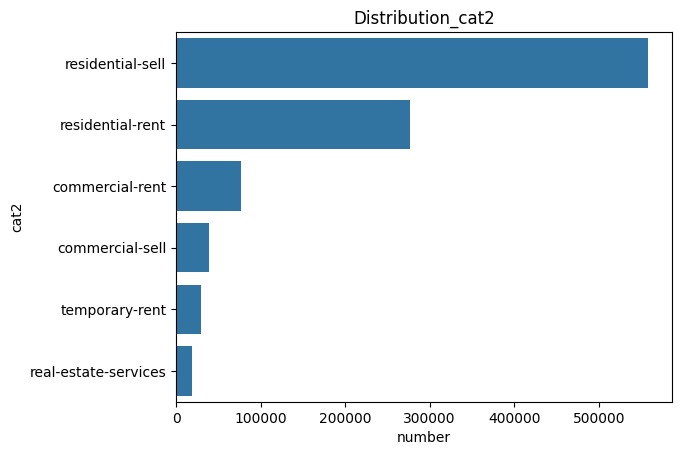

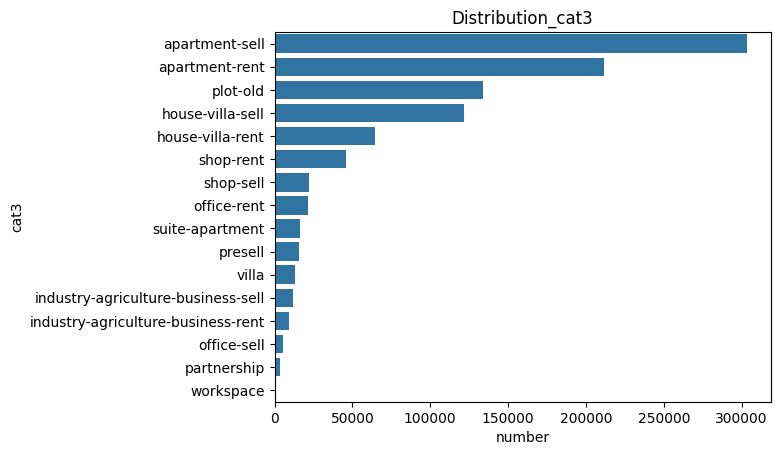

In [14]:
## نمایش توزیع آگهی های موجود در دسته بندی 2 و 3
"""طبق نمایش توزیع دسته بندی های 2 و 3 در دسته بندی 2 بیشترین آگهی های ثبت شده برای فروش مسکونی
و در دسته بندی 3 بیشترین آگهی ها مربوط به فروش آپارتمان مسکونی میباشد"""
cat2 = data_set["cat2_slug"].value_counts()
cat3 = data_set["cat3_slug"].value_counts()
sns.countplot(data=data_set, y="cat2_slug", order=cat2.index)
plt.title("Distribution_cat2")
plt.xlabel("number")
plt.ylabel("cat2")
plt.show()
sns.countplot(data=data_set, y="cat3_slug", order=cat3.index)
plt.title("Distribution_cat3")
plt.xlabel("number")
plt.ylabel("cat3")
plt.show()


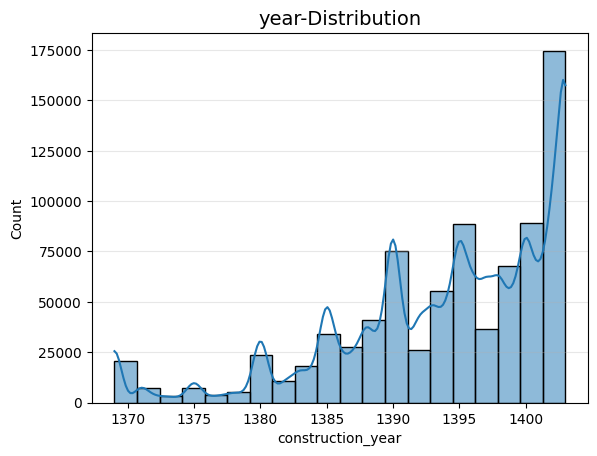

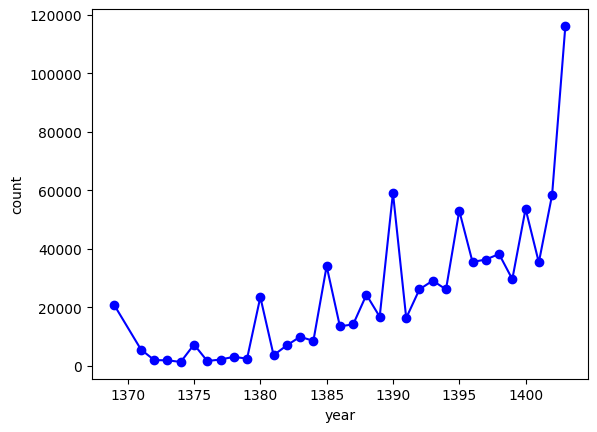

In [24]:
# نمایش هیستوگرام سال ساخت
"""در اینجا هیستوگرام سال ساخت نمایش داده شده که در آن کاملا مشخص است که روند مسکن سازی سیر صعودی داشته
در ادامه نمودار خطی این روند نیز به نمایش گذاشته شده
"""
data_set2
year_of_manufacture = data_set2["construction_year"]
sns.histplot(data=year_of_manufacture, bins=20, kde=True)
plt.title("year-Distribution", fontsize=14)
plt.grid(axis='y', alpha=0.3)
plt.show()
year_counts = data_set2["construction_year"].value_counts().sort_index()
plt.plot(year_counts.index, year_counts.values, marker='o', linestyle='-', color='blue')
plt.xlabel("year")
plt.ylabel("count")
plt.show()



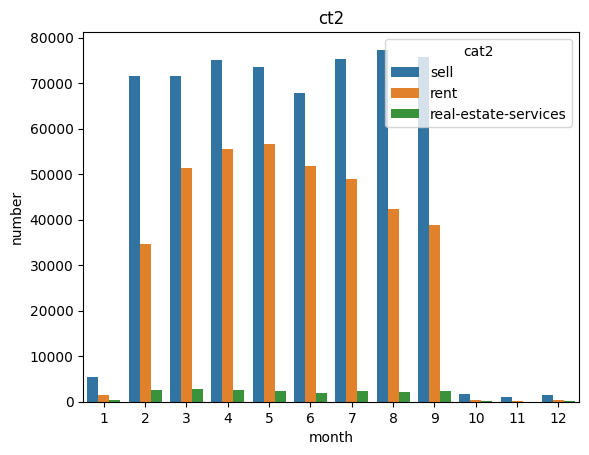

In [34]:
#تعداد آگهی‌های منتشر شده در ماه‌های مختلف را برای فروش و اجاره"""
data_set4["cat2_slug"] = data_set4["cat2_slug"].replace({
    "residential-sell":"sell",
    "residential-rent": "rent",
    "commercial-rent":"rent",
    "commercial-sell":"sell",
    "temporary-rent":"rent"
})
sns.countplot(data=data_set4, x="created_at_month", hue="cat2_slug")
plt.title("ct2")
plt.xlabel("month")
plt.ylabel("number")
plt.legend(title="cat2")
plt.show()
# data_set3

(array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14.]),
 [Text(0.0, 0, '0'),
  Text(2.0, 0, '2'),
  Text(4.0, 0, '4'),
  Text(6.0, 0, '6'),
  Text(8.0, 0, '8'),
  Text(10.0, 0, '10'),
  Text(12.0, 0, '12'),
  Text(14.0, 0, '14')])

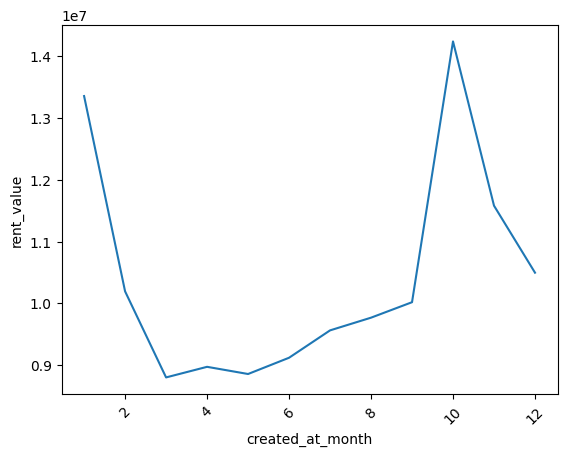

In [47]:
# ترند میانگین قیمت اجاره در ماه های مختلف
data_set5["created_at_month"]
data_set6["rent_value"]
# month_map = {
#     1: "farvardin",
#     2: "ordibehesht",
#     3: "khordad",
#     4: "tir",
#     5: "mordad",
#     6: "shahrivar",
#     7: "mehr",
#     8: "aban",
#     9: "azar",
#     10: "dey",
#     11: "bahman",
#     12: "esfand"
# }
# df1["created_at_month"] = df1["created_at_month"].map(month_map)

df3 = pd.concat([data_set5,data_set6], axis=1)
v = df3.groupby("created_at_month")["rent_value"].mean().reset_index()
monthly_stats = v.sort_values("created_at_month")
sns.lineplot(
    data=monthly_stats,
    x = "created_at_month",
    y = "rent_value",
)
plt.xticks(rotation=45)


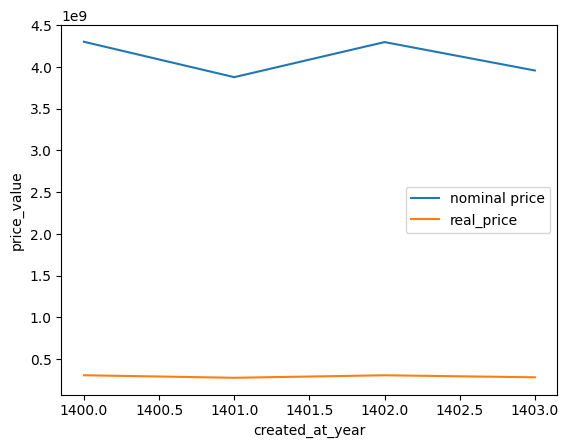

In [50]:
# سوال 7
df3.dropna()
real_price_year = df3.groupby("created_at_year")["price_value"].mean().reset_index()
real_price_year
real_price_year = real_price_year[real_price_year["created_at_year"] >= 1400]
base = 1400
base_price = real_price_year.loc[real_price_year['created_at_year']==base, "price_value"].values[0]
real_price_year["real_price"] = (real_price_year["price_value"] / base) * 100
real_price_year
sns.lineplot(data=real_price_year, x="created_at_year", y="price_value", label="nominal price")
sns.lineplot(data=real_price_year, x="created_at_year", y="real_price", label="real_price")
plt.show()
